In [3]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import sin, cos, pi, linspace

In [77]:
days_lived_list=[10] #range(1, 101)
host_loc_list= range(0,2526)


mosquito_radius= 50
host_found=0
runs_list= [1000] #[10, 100, 1000, 10000, 50000, 80000, 100000]
initial_state= [0,0]
malaria_region_radius= 1000
smell_during_flight= False
check_last_day_limit= True
plot_intersection = False

In [6]:
def plot_points(points):
    points= np.array(points)
    fig, ax = plt.subplots()
    ax.scatter(points[...,0], points[...,1])
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.show()

In [82]:
#fix this: currently it finds intersection for line segment(when extended) interscting circle. 
# We need to find, intersection without extention of line segment

def check_intersection(curr_state, new_state, host_loc):
    #equation of line standar form A, B and C
    A= new_state[1] - curr_state[1]
    B= - (new_state[0] - curr_state[0])
    C= - ( (A*curr_state[0]) + (B*curr_state[1]) )

    #find perpendicular distance to host_location
    dist= (abs((A*host_loc[0]) + (B*host_loc[1])+ C)) / (math.sqrt(A*A + B*B))

    if dist <= mosquito_radius and plot_intersection:
        #plot line with host_location circle
        plt.plot(0,250, color = 'red', marker = 'o')
        plt.gca().annotate('O (0, 250)', xy=(0 + 0.1, 0 + 0.1), xycoords='data', fontsize=10)

        #draw a circle
        angles = linspace(0 * pi, 2 * pi, 100 )
        r=50
        xs = r*cos(angles)
        ys = 250+r*sin(angles)
        plt.plot(xs, ys, color = 'green')
        plt.xlim(-100, 200)
        plt.ylim(100, 400)
        plt.gca().set_aspect('equal')
        plt.plot([curr_state[0], new_state[0]],[curr_state[1], new_state[1]])
        plt.show()
        print(curr_state, new_state, dist)

        print(curr_state-50, new_state, dist)

    return dist <= mosquito_radius

    

In [78]:
def find_host(curr_state, host_loc):
    dist= np.linalg.norm(np.array(curr_state) - np.array(host_loc))
    return dist<=mosquito_radius

def red_region_limit(last_day_state):
    dist= np.linalg.norm(np.array(last_day_state) - np.array(initial_state))
    return dist>malaria_region_radius

def run_simulation(host_found, die_outside, n_runs, days_lived, host_loc):
    for runs in range(n_runs):
        curr_state=[0,0]
        points= [curr_state]
        for day in range(days_lived):
            smell= find_host(curr_state, host_loc) # return True/False
            if smell:
                host_found+=1
                break
            
            angle= np.random.randint(0, 360)
            x = curr_state[0]+ (250 * np.sin(math.radians(angle)))
            y = curr_state[1]+ (250 * np.cos(math.radians(angle)))

            if smell_during_flight and check_intersection(curr_state, [x,y], host_loc):
                #find if line intersects or is tangent to the yellow circle of radius 50m centered at (0,250)
                #compare perpendicular distance between the center of the circle and the line to the radius of the circle
                #p=r : touches the circle , p<r: line intersects the circle
                print("intersected.. ", day)
                host_found+=1
                return host_found, die_outside

            #check if mosquito is outside 1000m radius in the last_day 
            if check_last_day_limit and day==days_lived-1:
                out= red_region_limit(curr_state)
                if out:
                    die_outside+=1

            #verify if the dist between prev and next location is within 250m
            dist= round(np.linalg.norm(np.array([x,y]) - np.array(curr_state)),3)
            if dist >250:
                print(f"dist > 250 {dist} for runs {runs}")
                print("curr state: ", curr_state , [x,y])
                print("Exiting...")
                exit()
            curr_state= [x,y]
            points.append(curr_state)

    return host_found, die_outside



In [80]:

host_found_wrt_days=[]
die_outside_list= []

host_found_wrt_host_loc=[]

for n_runs in runs_list: #1000
    for days_lived in days_lived_list: #100
        print("days lived: ", days_lived)
        #if days_lived%10==0:
        #    print("days passed: ", days_lived)
        
        for h_loc in host_loc_list:
            curr_host_loc= [0, h_loc]
            
            if h_loc%100==0:
                print("h_loc processing: ", h_loc)
            
            host_found=0 
            die_outside=0
            host_found, die_outside= run_simulation(host_found, die_outside, n_runs, days_lived, curr_host_loc)

            host_found_wrt_host_loc.append(host_found/n_runs)
            
            #host_found_wrt_days.append(host_found/n_runs)
            #die_outside_list.append(die_outside/n_runs)


days lived:  10
h_loc processing:  0
h_loc processing:  100
h_loc processing:  200
h_loc processing:  300
h_loc processing:  400
h_loc processing:  500
h_loc processing:  600
h_loc processing:  700
h_loc processing:  800
h_loc processing:  900
h_loc processing:  1000
h_loc processing:  1100
h_loc processing:  1200
h_loc processing:  1300
h_loc processing:  1400
h_loc processing:  1500
h_loc processing:  1600
h_loc processing:  1700
h_loc processing:  1800
h_loc processing:  1900
h_loc processing:  2000
h_loc processing:  2100
h_loc processing:  2200
h_loc processing:  2300
h_loc processing:  2400
h_loc processing:  2500


In [83]:
with open('your_file.txt', 'w') as f:
    for item in host_found_wrt_host_loc:
        f.write("%s\n" % item)

In [82]:
pd.to_csv(host_found_wrt_host_loc

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.069,
 0.08,
 0.075,
 0.074,
 0.078,
 0.074,
 0.077,
 0.082,
 0.083,
 0.073,
 0.082,
 0.071,
 0.069,
 0.053,
 0.073,
 0.057,
 0.062,
 0.076,
 0.076,
 0.054,
 0.067,
 0.052,
 0.058,
 0.061,
 0.06,
 0.065,
 0.062,
 0.065,
 0.07,
 0.063,
 0.075,
 0.052,
 0.061,
 0.066,
 0.062,
 0.052,
 0.053,
 0.044,
 0.06,
 0.055,
 0.058,
 0.063,
 0.051,
 0.06,
 0.059,
 0.051,
 0.067,
 0.059,
 0.056,
 0.066,
 0.06,
 0.052,
 0.056,
 0.052,
 0.049,
 0.049,
 0.061,
 0.069,
 0.052,
 0.052,
 0.056,
 0.047,
 0.068,
 0.057,
 0.052,
 0.053,
 0.054,
 0.053,
 0.079,
 0.044,
 0.05,
 0.041,
 0.059,
 0.062,
 0.047,
 0.056,
 0.054,
 0.053,
 0.059,
 0.05,
 0.049,
 0.057,
 0.047,
 0.037,
 0.056,
 0.049,
 0.055,
 0.045

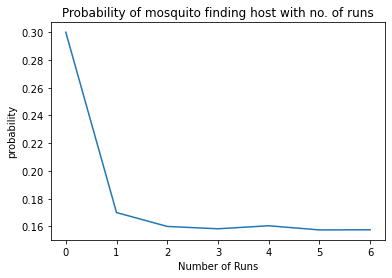

In [69]:
plt.plot(np.array(die_outside_list))
plt.title("Probability of mosquito finding host with no. of runs")
plt.xlabel("Number of Runs")
plt.ylabel("probability")
plt.savefig("test3.png")

Text(0, 0.5, 'probability')

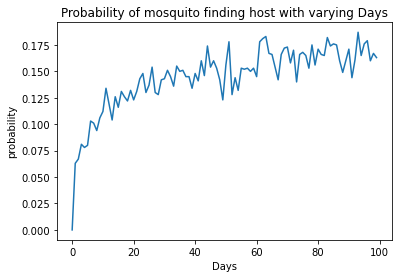

In [70]:
plt.plot(np.array(host_found_wrt_days1))
plt.title("Probability of mosquito finding host with varying Days")
plt.xlabel("Days")
plt.ylabel("probability")
#plt.savefig("test2.png")

Text(0, 0.5, 'probability')

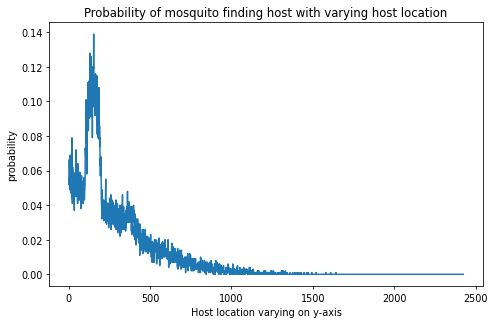

In [86]:
plt.figure(figsize=(8, 5), dpi=70)

plt.plot(np.array(host_found_wrt_host_loc[100:]))
plt.title("Probability of mosquito finding host with varying host location")
plt.xlabel("Host location varying on y-axis")
plt.ylabel("probability")

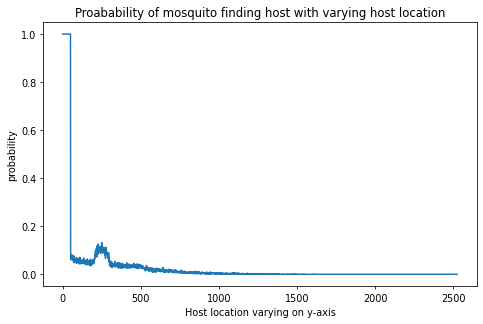

In [61]:
plt.figure(figsize=(8, 5), dpi=70)

plt.plot(np.array(host_found_wrt_host_loc))
plt.title("Probability of mosquito finding host with varying host location")
plt.xlabel("Host location varying on y-axis")
plt.ylabel("probability")
plt.savefig()